## Playing with parallelism in R

## Beyond Single-Core R
Slides by Jonathan Dursi,  https://ljdursi.github.io/beyond-single-core-R/#/1

In [1]:
print(system('hostname'))

[1] 0


In [2]:
print(system('hostname; uptime', intern=TRUE))


ERROR: Error in system("hostname; uptime", intern = TRUE): error in running command


In [22]:
install.packages('doSNOW')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(snow)
library(doSNOW)

Loading required package: foreach

Loading required package: iterators



### Slide 31 mcparallel/mccollect

https://ljdursi.github.io/beyond-single-core-R/#/31

In [5]:
library(parallel, quiet=TRUE)
source("data/airline/read_airline.R")
jan2010 <- read.airline("data/airline/airOT201001.csv.gz")
unique.planes <- mcparallel( length( unique( sort(jan2010$TAIL_NUM) ) ) ) 
median.elapsed <- mcparallel( median( jan2010$ACTUAL_ELAPSED_TIME, na.rm=TRUE ) )
ans <- mccollect( list(unique.planes, median.elapsed) )
ans

$`180`
[1] 4555

$`181`
[1] 110

In [13]:
library(parallel)
source("data/airline/read_airline.R")
jan2010 <- read.airline("data/airline/airOT201001.csv.gz")
unique.planes <- mcparallel( length( unique( sort(jan2010$TAIL_NUM) ) ) ) 
median.elapsed <- mcparallel( median( jan2010$ACTUAL_ELAPSED_TIME, na.rm=TRUE ) )
mccollect( unique.planes  )
mccollect( median.elapsed ) 
#ans <- mccollect( list(unique.planes, median.elapsed) )
#ans

$`190`
[1] 4555

$`191`
[1] 110

In [15]:
unique.planes <- ( length( unique( sort(jan2010$TAIL_NUM) ) ) ) 
median.elapsed <- ( median( jan2010$ACTUAL_ELAPSED_TIME, na.rm=TRUE ) )

In [17]:
unique.planes

[1] 4555

In [19]:
median.elapsed

[1] 110

In [ ]:
# slide 32


In [20]:
system.time(fit1 <-  lm(DISTANCE ~ AIR_TIME, data=jan2010))


   user  system elapsed 
  0.089   0.038   0.127 

In [46]:
system.time(fit2 <-  lm(ARR_DELAY ~ DEP_DELAY, data=jan2010))
fit2

   user  system elapsed 
  0.077   0.008   0.085 


Call:
lm(formula = ARR_DELAY ~ DEP_DELAY, data = jan2010)

Coefficients:
(Intercept)    DEP_DELAY  
     -4.497        1.002  


In [55]:
# slide 33
parfits <- function() {
  pfit1 <- mcparallel(lm(DISTANCE ~ AIR_TIME, data=jan2010))
  pfit2 <- mcparallel(lm(ARR_DELAY ~ DEP_DELAY, data=jan2010))
  res2 = mccollect( list(pfit1, pfit2) )
}
system.time( parfits() )

   user  system elapsed 
  0.097   0.132   0.530 

In [58]:
parfits <- function() {
  pfit1 <- mcparallel(lm(DISTANCE ~ AIR_TIME, data=jan2010))
  pfit2 <- mcparallel(lm(ARR_DELAY ~ DEP_DELAY, data=jan2010))
  res1a = mccollect( pfit1 )
  res1b = mccollect( pfit2 )
}
system.time( parfits() )

   user  system elapsed 
  0.310   0.522   0.791 

In [64]:
parfits

function() {
  pfit1 <- mcparallel(lm(DISTANCE ~ AIR_TIME, data=jan2010))
  pfit2 <- mcparallel(lm(ARR_DELAY ~ DEP_DELAY, data=jan2010))
  res1a = mccollect( pfit1 )
  res1b = mccollect( pfit2 )
}

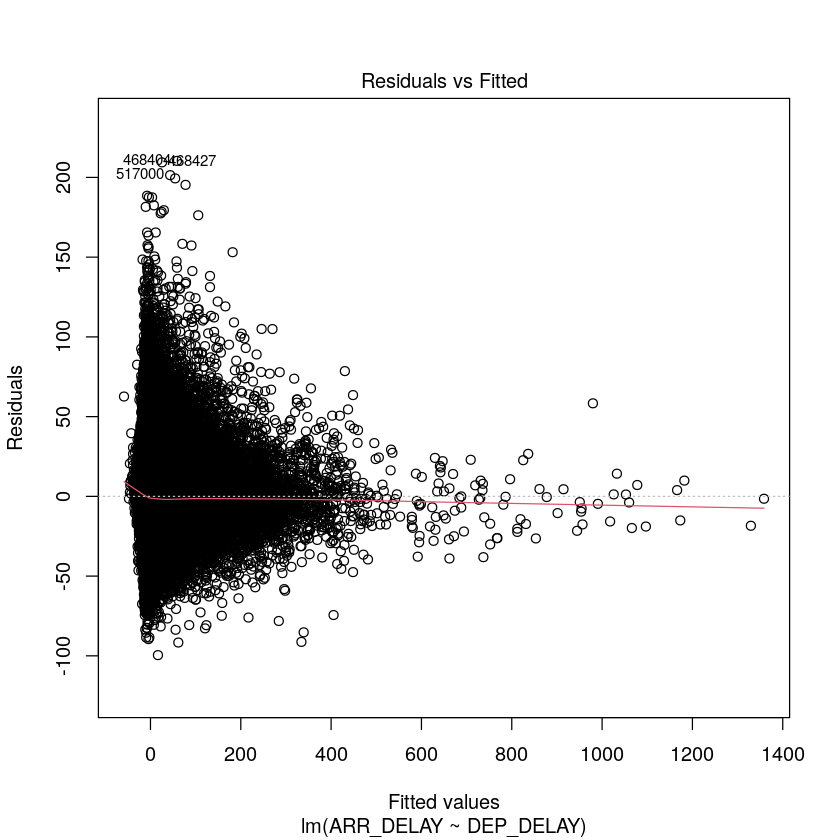

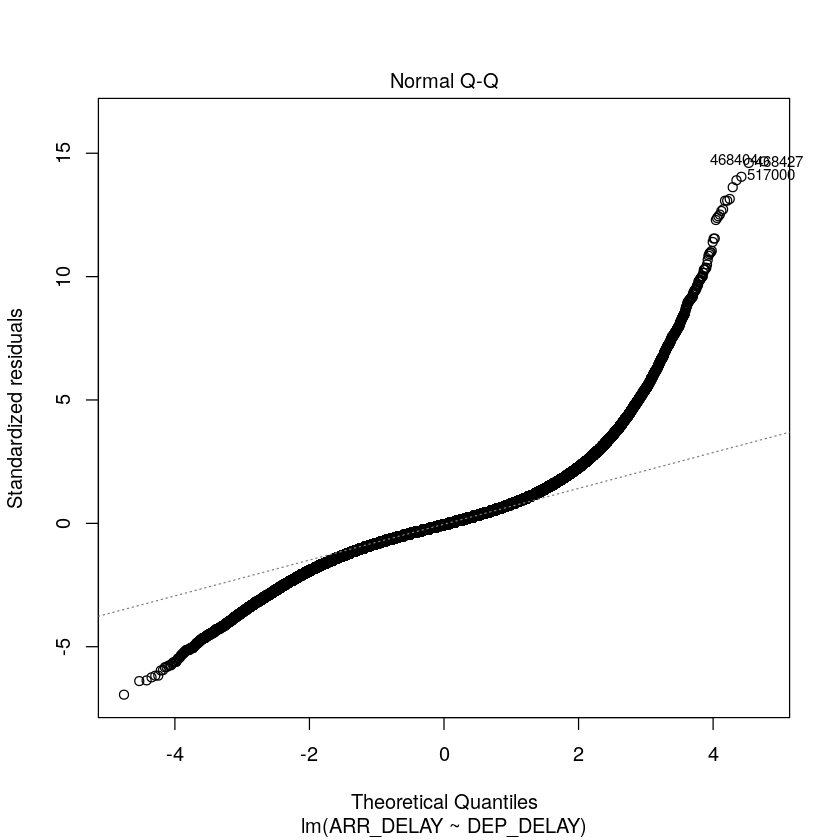

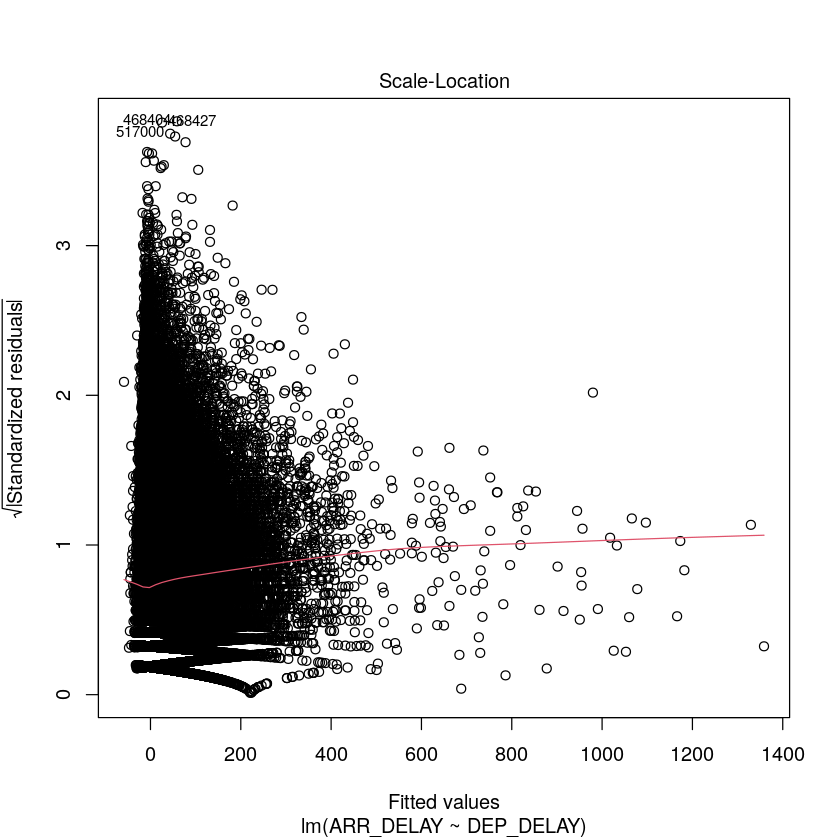

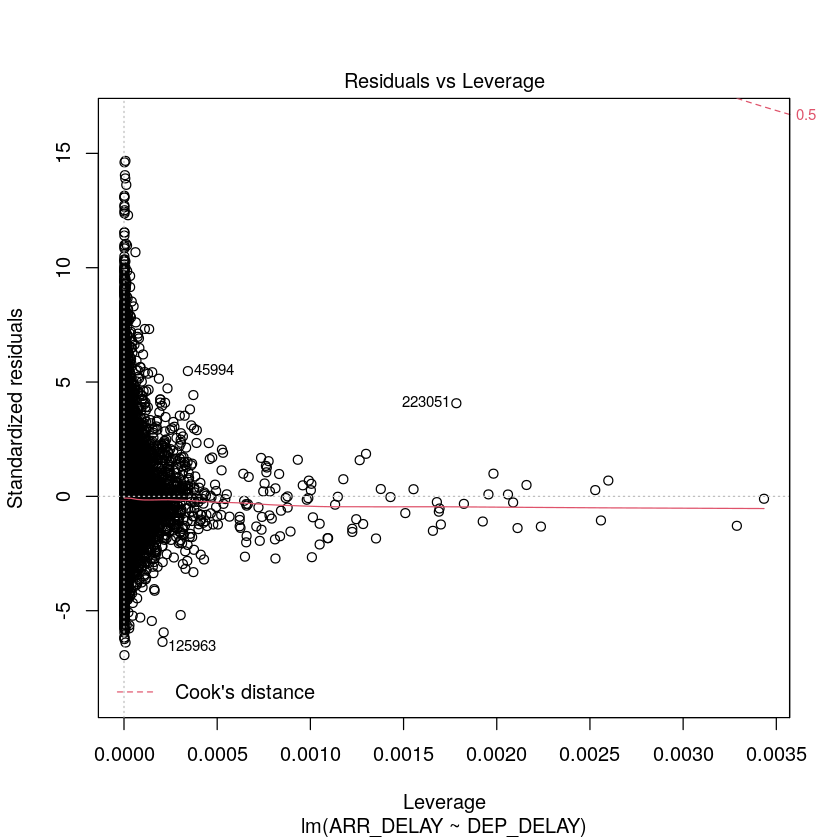

In [32]:
plot(fit2)

In [63]:
plot(pfit1)


ERROR: Error in plot(pfit1): object 'pfit1' not found


In [ ]:
head(jan2010)

In [35]:
describe(jan2010)

ERROR: Error in describe(jan2010): could not find function "describe"


In [41]:
## summary(jan2010)

In [45]:
## install.packages('psych')

In [44]:
## https://dabblingwithdata.wordpress.com/2018/01/02/my-favourite-r-package-for-summarising-data/
library(psych)
psych::describe(jan2010)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in 

,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YEAR,1,521809,2.010000e+03,0.000000e+00,2010,2010,0,0.000000e+00
MONTH,2,521809,1.000000e+00,0.000000e+00,1,1,0,0.000000e+00
DAY_OF_MONTH,3,521809,1.593582e+01,8.916269e+00,1,31,30,1.234319e-02
DAY_OF_WEEK,4,521809,4.120437e+00,2.006179e+00,1,7,6,2.777243e-03
FL_DATE,5,521809,NaN,NA,Inf,-Inf,-Inf,NA
UNIQUE_CARRIER,6,521809,NaN,NA,Inf,-Inf,-Inf,NA
TAIL_NUM,7,521809,NaN,NA,Inf,-Inf,-Inf,NA
FL_NUM,8,521809,2.489016e+03,2.107702e+03,1,7813,7812,2.917786e+00
ORIGIN_AIRPORT_ID,9,521809,1.266323e+04,1.522007e+03,10135,16218,6083,2.106983e+00


In [29]:
??read

R Information

Vignettes with name or keyword or title matching ‘read’ using regular
expression matching:


readr::readr            Introduction to readr
sf::sf2                 2. Reading, Writing and Converting Simple
                        Features
zoo::zoo-read           Reading Data in zoo


Type 'vignette("FOO", package="PKG")' to inspect entries 'PKG::FOO'.



Demos with name or title matching ‘read’ using regular expression
matching:


pbdZMQ::mspoller        pbdZMQ Multiple socket reader using poll
                        method.
pbdZMQ::msreader        pbdZMQ Multiple socket reader.
sf::bm_wkb              benchmark for reading larg(ish)
                        well-known-binary data, comparing sf and wkb
sf::nc                  load (read) North Carolina sids data set from a
                        geopackage file
spacetime::CressieWikle
                        demo that reads the data from the Cressie &
                        Wikle book.


Type 'demo(PKG::FOO)' to run dem

In [11]:
?parallel::mccollect

mcparallel {parallel},R Documentation
expr,"expression to evaluate (do not use any on-screen devices or GUI elements in this code, see mcfork for the inadvisability of using mcparallel with GUI front-ends and multi-threaded libraries). Raw vectors are reserved for internal use and cannot be returned, but the expression may evaluate e.g. to a list holding a raw vector. NULL should not be returned because it is used by mccollect to signal an error."
name,an optional name (character vector of length one) that can be associated with the job.
mc.set.seed,logical: see section ‘Random numbers’.
silent,if set to TRUE then all output on stdout will be suppressed (stderr is not affected).
mc.affinity,either a numeric vector specifying CPUs to restrict the child process to (1-based) or NULL to not modify the CPU affinity
mc.interactive,"logical, if TRUE or FALSE then the child process will be set as interactive or non-interactive respectively. If NA then the child process will inherit the interactive flag from the parent."
detached,"logical, if TRUE then the job is detached from the current session and cannot deliver any results back - it is used for the code side-effect only."
jobs,list of jobs (or a single job) to collect results for. Alternatively jobs can also be an integer vector of process IDs. If omitted collect will wait for all currently existing children.
wait,"if set to FALSE it checks for any results that are available within timeout seconds from now, otherwise it waits for all specified jobs to finish."
timeout,timeout (in seconds) to check for job results – applies only if wait is FALSE.


In [19]:
library(doParallel)


NumThread = detectCores() ## return number of cores on machine
print(c('detectCores', detectCores()))

NumThread = 4


clus1 = makeCluster( NumThread, outfile="clus1.out", type = "SOCK" )   ## create a cluster object

clusterCall(clus1, function() {
    library(doSNOW)
    registerDoSNOW(makeCluseter(3, type="SOCK"))
    foreach(j=1:4) %dopar% {
        c(j, j^3)
    }
    
    
})


registerDoParallel(clus1)
foreach(i=1:4) %dopar% {
    c(i, i^2)

}

    # the %dopar% says to run the foreach loop in parallel for each item
    # all console output inside cluster object will go to outfile 
    # there are eg combine=rbind to merge result

stopCluster(clus1)



[1] "detectCores" "16"         


ERROR: Error in checkForRemoteErrors(lapply(cl, recvResult)): 4 nodes produced errors; first error: there is no package called ‘doSNOW’
